In [ ]:
!pip install pytorch-lightning
!pip install pytorch-lightning-bolts

     |████████████████████████████████| 819kB 7.3MB/s 
     |████████████████████████████████| 112kB 22.5MB/s 
     |████████████████████████████████| 829kB 10.7MB/s 
     |████████████████████████████████| 276kB 34.3MB/s 
     |████████████████████████████████| 1.3MB 40.3MB/s 
     |████████████████████████████████| 143kB 39.7MB/s 
     |████████████████████████████████| 296kB 39.6MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=454f52119d527c73637152177dfef2a135e77e60c759d4eab005d1457bacae17
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=8f51e724a07c40af8035ea20f8b6704417cd430f1b5b1eee4843a4f4a75d4eb9
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163

In [ ]:
import pl_bolts
from pl_bolts.models.gans import GAN
from pl_bolts.models.autoencoders import VAE,AE
import pytorch_lightning as pl
import torchvision
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt





/usr/local/lib/python3.6/dist-packages/pl_bolts/utils/warnings.py:32: UserWarning: You want to use `wandb` which is not installed yet, install it with `pip install wandb`.
  f' install it with `pip install {pypi_name}`.' + extra_text


In [ ]:
print("numpy version:",np.__version__)
print("torch version:",torch.__version__)
print("pytorch ligthening version:",pl.__version__)
print("matplotlib version:",matplotlib.__version__)
print("Pytorch Lightening bolts version:",pl_bolts.__version__)

numpy version: 1.19.5
torch version: 1.7.0+cu101
pytorch ligthening version: 1.2.0
matplotlib version: 3.2.2
Pytorch Lightening bolts version: 0.3.0


In [ ]:
image_size = 32 
batch_size = 150
total_images = 500

T = torchvision.transforms.Compose([torchvision.transforms.Resize(image_size), torchvision.transforms.ToTensor()])
difar10_dataset = torchvision.datasets.CIFAR10('CIFAR10',transform=T, download=True, train=False)


difar10_dataset = torch.utils.data.random_split(difar10_dataset, [total_images, len(difar10_dataset)-total_images])[0]




Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10


In [ ]:
difar10_dataloader = torch.utils.data.DataLoader(difar10_dataset, batch_size=batch_size)

In [ ]:
%%time
latent_dim = 5
model = AE(image_size, latent_dim=latent_dim, lr=0.001,)
trainer = pl.Trainer(gpus=1, max_epochs=200, progress_bar_refresh_rate=25)
trainer.fit(model, train_dataloader= difar10_dataloader)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)

  | Name    | Type          | Params
------------------------------------------
0 | encoder | ResNetEncoder | 11.2 M
1 | decoder | ResNetDecoder | 6.6 M 
2 | fc      | Linear        | 2.6 K 
------------------------------------------
17.7 M    Trainable params
0         Non-trainable params
17.7 M    Total params
70.963    Total estimated model params size (MB)



CPU times: user 3min 56s, sys: 1min 36s, total: 5min 32s
Wall time: 8min 48s


In [ ]:
 # specifying the overall grid size
image_data = []
pred = None
for val in fashion_mnist_dataloader:
  pred = model(val[0])
  break

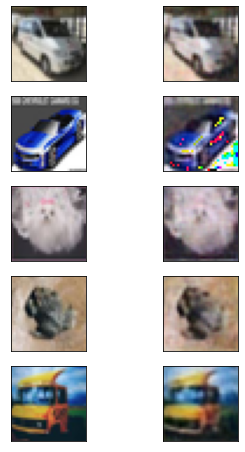

In [ ]:
plt.figure(figsize=(5,8))
for idx,value in enumerate(pred):
  image_data.append(val[0][idx])
  image_data.append(pred[idx])

for i in range(10):
    plt.subplot(5,2,i+1)    # the number of images in the grid is 5*2 (10)
    plt.imshow(torchvision.transforms.ToPILImage()(image_data[i]))
    plt.xticks([])
    plt.yticks([])